# Storm Identification and Mode Classification 

In [1]:
import sys, os 
current_dir = os.getcwd()
path = os.path.dirname(current_dir)
sys.path.append(path)

In [2]:
import monte_python

import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["white", "red", "blue", "green", "purple", 'gray'])

In [3]:
mode_converter = {
        "NONROT": "ORD",
        "ROTATE": "SUP",
        "QLCS": "QLCS",
        "SUP_CLUST": "SUP_CLUS",
        "QLCS_NON": "QLCS_ORD",
        "QLCS_ROT": "QLCS_MESO",
        "CLUSTER": "CLUS",
        "AMORPHOUS": "OTHER",
        "CLUS_NON": "ORD",
        "CLUS_ROT": "SUP",
        "CLUS_CLU": "CLUS_CLUUUUUUUUU",
        "CELL_ROT": "CELL_ROTTTTTTTTTT",
        "CELL_NON": "CELL_ORDDDDDDDDDD",
    }

retain_storm_types = [
    "ROTATE",
    "NONROT",
    "SEGMENT",
    "QLCS",
    "CLUSTER",
    "LIN_CLUS",
    "AMORPHOUS",
    "BOW_QLCS",
    "SUP_CLUST",
]

storm_type_digitize = {key: n for n, key in enumerate(retain_storm_types)}

In [4]:
with open('/Users/monte.flora/Desktop/storm_mode/STORM_OBJECTS_newse1.pkl', 'rb') as f:
    data = pickle.load(f)

In [5]:
data

{'labels': [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]])],
 'props': [[<skimage.measure._regionprops.RegionProperties at 0x7f7f1902f358>,
 'dates': ['20180509'],
 'init_times': ['0000'],
 'valid_times': ['0100'],
 'lead_times': [60],
 'lats': [masked_array(
    data=[[36.710262298583984, 36.71174240112305, 36.71320343017578, ...,
           36.71320343017578, 36.71174240112305, 36.710262298583984],
          [36.737850189208984, 36.73931121826172, 36.74078369140625, ...,
           36.74078369140625, 36.73931121826172, 36.737850189208984],
          [36.765419006347656, 36.76688766479492, 36.76836013793945, ...,
           36.76836013793945, 36.76688766479492, 36.765419006347656],
          ...,
          [43.566158294677734, 43.56782150268555, 43.56948471069336, ...,
           43.56948471069336, 43.56782150268555, 

In [6]:
dbz_vals = data['values'][0]
rot_vals = data['rot_values'][0]

In [7]:
dbz_qc_params = [
            ("min_area", 15),
            ("merge_thresh", 3),
            ("max_thresh", (44.93, 100)),
        ]


dbz_qc_params2 = [
            ("min_area", 10),
            ("merge_thresh", 0),
            ("max_thresh", (44.93, 100)),
        ]

uh_qc_params = [("merge_thresh", 1),
                ("min_area", 5),
                ]

clf = monte_python.StormModeClassifier(dbz_thresh=43.0, 
                                       rot_thresh=55,
                                       dbz_qc_params = dbz_qc_params,
                                       rot_qc_params = uh_qc_params,
                                       dbz_qc_params2 = dbz_qc_params2,
                                       verbose=True
                                      )

results = clf.classify(dbz_vals = dbz_vals, rot_vals=rot_vals, label_embedded=True)
storm_labels, object_props = results['dbz_labels'], results['dbz_props']
storm_modes, storm_embs = results['storm_modes'], results['storm_embs']

Before final QC

------------------------------
['AMORPHOUS', 'NONROT', 'NONROT', 'NONROT', 'ROTATE', 'NONROT', 'NONROT', 'AMORPHOUS', 'NONROT', 'NONROT', 'NONROT', 'AMORPHOUS', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'ROTATE', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT']
------------------------------

Removing stuff...
Reclassifying QLCSs as CELLs...
Checking if there are embedded storms...
depth = 1
Removing singleton NONROT from AMORPHOUS (which is now a NONROT)
Removing singleton NONROT from NONROT (which is now a NONROT)
Converting parent NONROT to CLUSTER
Converting parent AMORPHOUS to CLUSTER
Converting parent CLUSTER to CLUSTER
Converting parent CLUSTER to CLUSTER
Converting parent NONROT to CLUSTER
Converting parent CLUSTER to CLUSTER
Converting parent AMORPHOUS to CLUSTER
Converting parent CLUSTER to CLUSTER
Removing singleton NONRO

In [8]:
print(storm_modes)

['CLUSTER', 'CLUSTER', 'NONROT', 'NONROT', 'ROTATE', 'NONROT', 'CLUSTER', 'NONROT', 'NONROT', 'NONROT', 'AMORPHOUS', 'CLUSTER', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'ROTATE', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT', 'NONROT']


In [9]:
mode_converter = {
        "NONROT": "ORD",
        "ROTATE": "SUP",
        "QLCS": "QLCS",
        "SUP_CLUST": "SUP_CLUS",
        "QLCS_NON": "QLCS_ORD",
        "QLCS_ROT": "QLCS_MESO",
        "CLUSTER": "CLUS",
        "AMORPHOUS": "OTHER",
        "CLUS_NON": "ORD",
        "CLUS_ROT": "SUP",
        "CLUS_CLU": "CLUS_CLUUUUUUUUU",
        "CELL_ROT": "CELL_ROTTTTTTTTTT",
        "CELL_NON": "CELL_ORDDDDDDDDDD",
    }

retain_storm_types = [
    "ROTATE",
    "NONROT",
    "SEGMENT",
    "QLCS",
    "CLUSTER",
    "LIN_CLUS",
    "AMORPHOUS",
    "BOW_QLCS",
    "SUP_CLUST",
]


In [10]:
converted_modes = [mode_converter[m] for m in storm_modes]
print(converted_modes)

['CLUS', 'CLUS', 'ORD', 'ORD', 'SUP', 'ORD', 'CLUS', 'ORD', 'ORD', 'ORD', 'OTHER', 'CLUS', 'ORD', 'ORD', 'ORD', 'ORD', 'ORD', 'ORD', 'ORD', 'ORD', 'ORD', 'ORD', 'ORD', 'ORD', 'ORD', 'ORD', 'ORD', 'ORD', 'SUP', 'ORD', 'ORD', 'ORD', 'ORD', 'ORD', 'ORD', 'ORD']


In [11]:
len(np.unique(storm_labels)), len(converted_modes)

(16, 36)

In [27]:
true_storm_types = data['storm_types'][0]
print('True Storm Modes: ', true_storm_types, len([int(m) if (m != ' ') else int(m) for m in true_storm_types]) )

ValueError: invalid literal for int() with base 10: ' '

In [13]:
true_labels = data['labels'][0]
print(len(np.unique(true_labels)))
print(len(data['storm_types'][0]))

13
100


In [14]:
np.unique(storm_labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
       301, 402, 403])

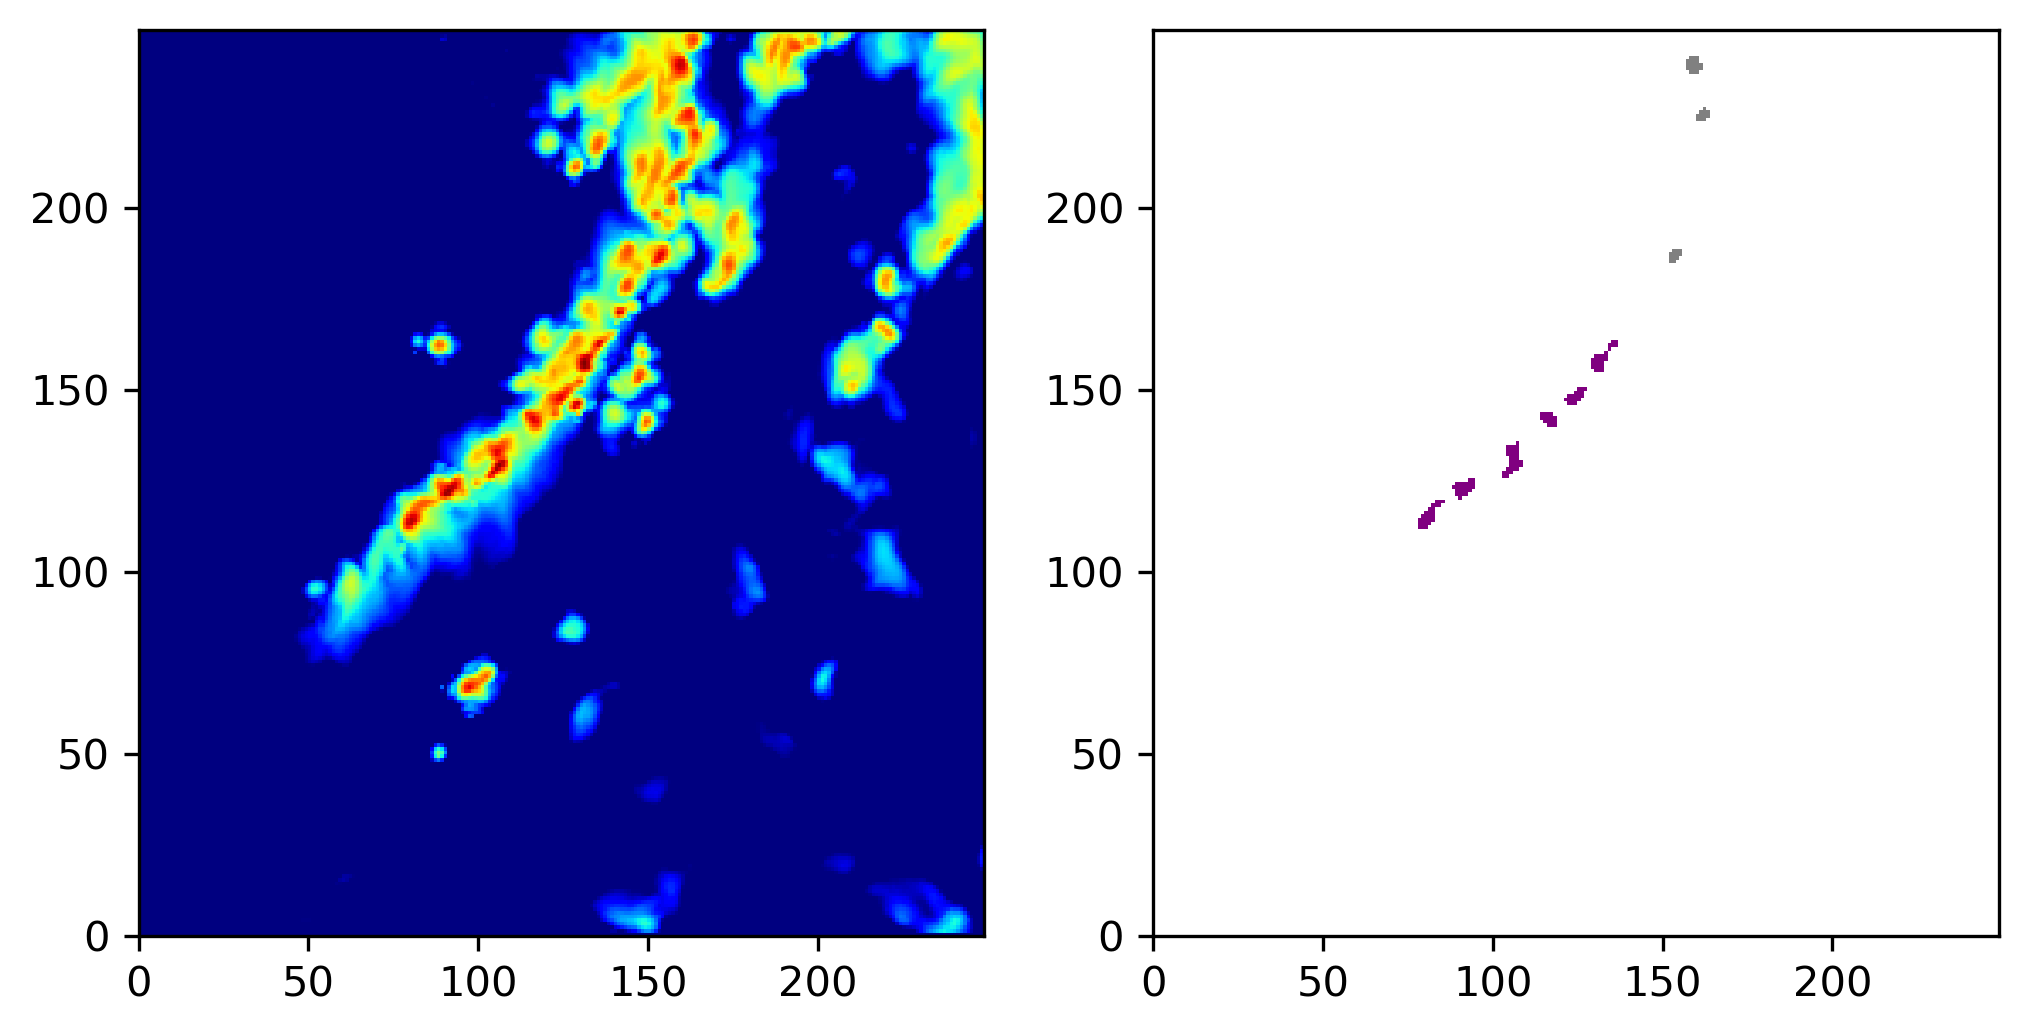

In [15]:
def label_centroid(ax, object_props):
    """Place object label on object's centroid"""
    for region in object_props:
        x_cent,y_cent = region.centroid
        x_cent=int(x_cent)
        y_cent=int(y_cent)
        xx, yy = x[x_cent,y_cent], y[x_cent,y_cent]
        fontsize = 6.5 if region.label >= 10 else 8
        ax.text(xx,yy,
                    region.label,
                    fontsize=fontsize,
                    ha='center',
                    va='center',
                    color = 'k'
                    )

x,y = np.meshgrid(range(250), range(250))
fig, axes = plt.subplots(dpi=300, ncols=2, figsize=(8,4))

true_labels = data['labels'][0]

for ax, z, cm in zip(axes, [dbz_vals, storm_labels], ['jet', cmap]):
    ax.pcolormesh(x, y, z, cmap=cm)
#label_centroid(ax, object_props) 